Class=1, n=212 (31.595%)
Class=3, n=144 (21.461%)
Class=0, n=203 (30.253%)
Class=2, n=112 (16.692%)


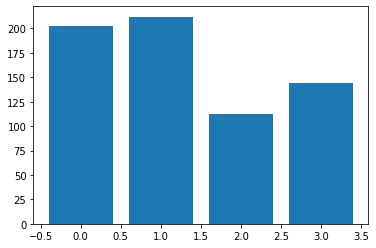

Class=1, n=212 (25.000%)
Class=3, n=212 (25.000%)
Class=0, n=212 (25.000%)
Class=2, n=212 (25.000%)


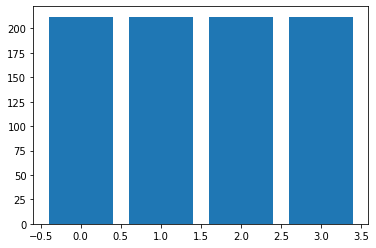

(678, 26) (678,)
(170, 26) (170,)
GNB------------------------------->
              precision    recall  f1-score   support

           0       0.41      0.65      0.50        46
           1       0.36      0.11      0.17        45
           2       0.42      0.72      0.53        46
           3       0.25      0.03      0.05        33

    accuracy                           0.41       170
   macro avg       0.36      0.38      0.31       170
weighted avg       0.37      0.41      0.33       170

ADB------------------------------->
              precision    recall  f1-score   support

           0       0.89      0.70      0.78        46
           1       0.62      0.40      0.49        45
           2       0.73      0.76      0.74        46
           3       0.51      0.88      0.64        33

    accuracy                           0.67       170
   macro avg       0.69      0.68      0.66       170
weighted avg       0.70      0.67      0.67       170

XGB---------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:324: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:350: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:363: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:389: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


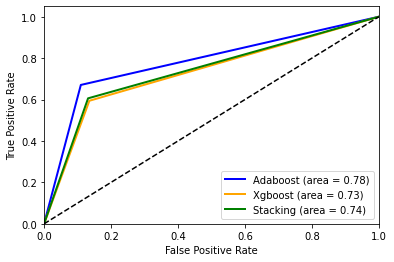

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Sun Sep 26 17:44:38 2021

@author: Akib Zaman
"""

from matplotlib import pyplot as plt
from sklearn import tree
import numpy as np
import pandas as pd
import scipy
from scipy import interp
import matplotlib
from matplotlib import pyplot as plt
from itertools import cycle
#from datetime import datetime, timedelta
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize

from scipy import sparse

from sklearn.model_selection import train_test_split
#from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn import multioutput
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier


from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import seaborn as sns
import pickle
from collections import Counter
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE

# ###Text-all
# train_feature=['number','percept','adverb','present','cause','warmth','wealthy','air_travel','envy','trust'
#                ,'torment','injury','banking','violence','kill','plant','avg_red','sd_red','avg_green','sd_green','avg_blue','sd_blue','avg_rgb','sd_rgb','avg_gray'
#                ,'sd_gray','avg_hue','sd_hue','avg_sat','sd_sat','avg_brght','sd_brght','No. Faces','age'
#                ,'gender','angry','disgust','fear','happy','sad','surprise','neutral','asian','indian','black'
#                ,'white','middle eastern','latino hispanic','score'
# ]


hybrid_df = pd.read_csv("/content/drive/MyDrive/DataMining/Datasets/Selected_Features.csv")
hybrid_df.isna().sum()
#hybrid_df = hybrid_df.fillna((0))

labelencoder = LabelEncoder()
hybrid_df['class']= labelencoder.fit_transform(hybrid_df['class'])
#dataset['Status']=  pd.to_numeric(dataset['Status'],errors='coerce')
#print(df['Status'])

# X = hybrid_df.loc[:,"WC_liwc":"latino hispanic"] # Features
# y = hybrid_df['class']# Target variable
X = hybrid_df.iloc[:, :-1].values
y = hybrid_df.iloc[:, -1].values


counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()


np.any(np.isnan(X))
np.all(np.isfinite(X))


#######Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



#######NB
print("GNB------------------------------->")
model_GNB = GaussianNB().fit(X_train,y_train)
y_pred_train=model_GNB.predict(X_train)
y11_pred_test = model_GNB.predict(X_test)
# print(metrics.classification_report(y_train, y_pred_train))
print(metrics.classification_report(y_test, y11_pred_test))

######KNN
# print("KNN------------------------------->")
# model_KNN = KNeighborsClassifier(n_neighbors=3)
# model_KNN.fit(X_train, y_train)
# y_pred_train=model_KNN.predict(X_train)
# y12_pred_test = model_KNN.predict(X_test)
# # print(metrics.classification_report(y_train, y_pred_train))
# print(metrics.classification_report(y_test, y12_pred_test))


########Adaboost Model
print("ADB------------------------------->")
base_classifier = DecisionTreeClassifier(max_depth=10)
model_adb= AdaBoostClassifier(base_estimator=base_classifier) 
#model_adb = AdaBoostClassifier(n_estimators=200,random_state=0)
model_adb = model_adb.fit(X_train,y_train)
y_pred_train=model_adb.predict(X_train)
y13_pred_test = model_adb.predict(X_test)
# print(metrics.classification_report(y_train, y_pred_train))
print(metrics.classification_report(y_test, y13_pred_test))
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred_4))
#print("f1-score:",metrics.f1_score(y_test, y_pred_4))
#pickle.dump(model_adb, open('trained_model\hybrid_model_adb.pkl','wb'))

print("XGB------------------------------>")
##XGBoost Classifier(54.05)
xgb_model = xgb.XGBClassifier()
xgb_model= xgb_model.fit(X_train, y_train)
y_pred_train=xgb_model.predict(X_train)
y14_pred_test = xgb_model.predict(X_test)
# print(metrics.classification_report(y_train, y_pred_train))
print(metrics.classification_report(y_test, y14_pred_test))
#pickle.dump(xgb_model, open('trained_model\hybrid_Model_xgb.pkl','wb'))

# ###LGBM
# print("LGBM------------------------------->")
# lgb_model=lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=50, min_data_in_leaf=5,
#                               learning_rate=0.8, n_estimators=100,  
#                               objective='multiclass', class_weight='balanced', 
#                               min_split_gain=0.0, 
#                               min_child_weight=0.03, min_child_samples=20, subsample=1.0, 
#                               subsample_freq=500, colsample_bytree=1.0,
#                               reg_lambda=0.65, random_state=0,num_classes=3)
# lgb_model= lgb_model.fit(X_train,y_train)
# y_pred_train=lgb_model.predict(X_train)
# y15_pred_test = lgb_model.predict(X_test)
# # print(metrics.classification_report(y_train, y_pred_train))
# print(metrics.classification_report(y_test, y15_pred_test))
#pickle.dump(lgb_model, open('trained_model\hybrid_model_lgb.pkl','wb'))





#RandonForest
print("RF------------------------------->")
model_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model_RF.fit(X_train,y_train)
y_pred_train=model_RF.predict(X_train)
y16_pred_test = model_RF.predict(X_test)
# print(metrics.classification_report(y_train, y_pred_train))
print(metrics.classification_report(y_test, y16_pred_test))
#pickle.dump(model_RF, open('trained_model\hybrid_model_RF.pkl','wb'))


# ##Stacking_Multiclass
# print("ST------------------------------->")
# estimators = [#('gnb', GaussianNB()),
#               ('lgb', lgb_model),
#               #('knn', KNeighborsClassifier(n_neighbors=3)),
#               ('rf', model_RF ),
#               #('adb',AdaBoostClassifier(n_estimators=100, random_state=0)),
#               ('xgb', xgb_model)
#               #('one',OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,random_state=30))),     
#               ]
# model_st = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())
# model_st.fit(X_train,y_train)
# y_pred_train=model_st.predict(X_train)
# y17_pred_test = model_st.predict(X_test)
# #print(metrics.classification_report(y_train, y_pred_train))
# print(metrics.classification_report(y_test, y17_pred_test))
# #pickle.dump(model_RF, open('trained_model\hybrid_model_st.pkl','wb'))


############################### AOC ###########################



y1_test=y_test

y11_prob=y11_pred_test
# y12_prob=y12_pred_test
y13_prob=y13_pred_test
y14_prob=y14_pred_test
# y15_prob=y15_pred_test
y16_prob=y16_pred_test
# y17_prob=y17_pred_test

# Binarize the output
y1_test= label_binarize(y1_test, classes=[0, 1, 2,3])
n_classes =y1_test.shape[1]

y11_prob= label_binarize(y11_prob, classes=[0, 1, 2, 3])
# y12_prob= label_binarize(y12_prob, classes=[0, 1, 2])
y13_prob= label_binarize(y13_prob, classes=[0, 1, 2, 3])
y14_prob= label_binarize(y14_prob, classes=[0, 1, 2, 3])
# y15_prob= label_binarize(y15_prob, classes=[0, 1, 2])
y16_prob= label_binarize(y16_prob, classes=[0, 1, 2, 3])
# y17_prob= label_binarize(y17_prob, classes=[0, 1, 2])
#y_test = np.argmax(y_test, axis = 0)
#y_prob = classifier.predict_proba(X_test)

##fpr_tpr determination
##11
fpr11 = dict()
tpr11 = dict()
roc_auc11 = dict()
for i in range(n_classes):
    fpr11[i], tpr11[i], _ = roc_curve(y1_test[:, i], y11_prob[:, i])
    roc_auc11[i] = auc(fpr11[i], tpr11[i])

##12
# fpr12 = dict()
# tpr12 = dict()
# roc_auc12 = dict()
# for i in range(n_classes):
#     fpr12[i], tpr12[i], _ = roc_curve(y1_test[:, i], y12_prob[:, i])
#     roc_auc12[i] = auc(fpr12[i], tpr12[i])
    
##13
fpr13 = dict()
tpr13 = dict()
roc_auc13 = dict()
for i in range(n_classes):
    fpr13[i], tpr13[i], _ = roc_curve(y1_test[:, i], y13_prob[:, i])
    roc_auc13[i] = auc(fpr13[i], tpr13[i])

##14
fpr14 = dict()
tpr14 = dict()
roc_auc14 = dict()
for i in range(n_classes):
    fpr14[i], tpr14[i], _ = roc_curve(y1_test[:, i], y14_prob[:, i])
    roc_auc14[i] = auc(fpr14[i], tpr14[i])
##15
# fpr15 = dict()
# tpr15 = dict()
# roc_auc15 = dict()
# for i in range(n_classes):
#     fpr15[i], tpr15[i], _ = roc_curve(y1_test[:, i], y15_prob[:, i])
#     roc_auc15[i] = auc(fpr15[i], tpr15[i])
##16
fpr16 = dict()
tpr16 = dict()
roc_auc16 = dict()
for i in range(n_classes):
    fpr16[i], tpr16[i], _ = roc_curve(y1_test[:, i], y16_prob[:, i])
    roc_auc16[i] = auc(fpr16[i], tpr16[i])

##17
# fpr17 = dict()
# tpr17 = dict()
# roc_auc17 = dict()
# for i in range(n_classes):
#     fpr17[i], tpr17[i], _ = roc_curve(y1_test[:, i], y17_prob[:, i])
#     roc_auc17[i] = auc(fpr17[i], tpr17[i])
    

# Compute micro-average ROC curve and ROC area
fpr11["micro"], tpr11["micro"], _ = roc_curve(y1_test.ravel(), y11_prob.ravel())
roc_auc11["micro"] = auc(fpr11["micro"], tpr11["micro"])

# fpr12["micro"], tpr12["micro"], _ = roc_curve(y1_test.ravel(), y12_prob.ravel())
# roc_auc12["micro"] = auc(fpr12["micro"], tpr12["micro"])

fpr13["micro"], tpr13["micro"], _ = roc_curve(y1_test.ravel(), y13_prob.ravel())
roc_auc13["micro"] = auc(fpr13["micro"], tpr13["micro"])

fpr14["micro"], tpr14["micro"], _ = roc_curve(y1_test.ravel(), y14_prob.ravel())
roc_auc14["micro"] = auc(fpr14["micro"], tpr14["micro"])

# fpr15["micro"], tpr15["micro"], _ = roc_curve(y1_test.ravel(), y15_prob.ravel())
# roc_auc15["micro"] = auc(fpr15["micro"], tpr15["micro"])

fpr16["micro"], tpr16["micro"], _ = roc_curve(y1_test.ravel(), y16_prob.ravel())
roc_auc16["micro"] = auc(fpr16["micro"], tpr16["micro"])

# fpr17["micro"], tpr17["micro"], _ = roc_curve(y1_test.ravel(), y17_prob.ravel())
# roc_auc17["micro"] = auc(fpr17["micro"], tpr17["micro"])


# First aggregate all false positive rates
all_fpr11 = np.unique(np.concatenate([fpr11[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr11 = np.zeros_like(all_fpr11)
for i in range(n_classes):
    mean_tpr11 += interp(all_fpr11, fpr11[i], tpr11[i])
# Finally average it and compute AUC
mean_tpr11 /= n_classes
fpr11["macro"] = all_fpr11
tpr11["macro"] = mean_tpr11
roc_auc11["macro"] = auc(fpr11["macro"], tpr11["macro"])


# First aggregate all false positive rates
# all_fpr12 = np.unique(np.concatenate([fpr12[i] for i in range(n_classes)]))
# # Then interpolate all ROC curves at this points
# mean_tpr12 = np.zeros_like(all_fpr12)
# for i in range(n_classes):
#     mean_tpr12 += interp(all_fpr12, fpr12[i], tpr12[i])
# # Finally average it and compute AUC
# mean_tpr12 /= n_classes
# fpr12["macro"] = all_fpr12
# tpr12["macro"] = mean_tpr12
# roc_auc12["macro"] = auc(fpr12["macro"], tpr12["macro"])


# First aggregate all false positive rates
all_fpr13 = np.unique(np.concatenate([fpr13[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr13 = np.zeros_like(all_fpr13)
for i in range(n_classes):
    mean_tpr13 += interp(all_fpr13, fpr13[i], tpr13[i])
# Finally average it and compute AUC
mean_tpr13 /= n_classes
fpr13["macro"] = all_fpr13
tpr13["macro"] = mean_tpr13
roc_auc13["macro"] = auc(fpr13["macro"], tpr13["macro"])


# First aggregate all false positive rates
all_fpr14 = np.unique(np.concatenate([fpr14[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr14 = np.zeros_like(all_fpr14)
for i in range(n_classes):
    mean_tpr14 += interp(all_fpr14, fpr14[i], tpr14[i])
# Finally average it and compute AUC
mean_tpr14 /= n_classes
fpr14["macro"] = all_fpr14
tpr14["macro"] = mean_tpr14
roc_auc14["macro"] = auc(fpr14["macro"], tpr14["macro"])


# First aggregate all false positive rates
# all_fpr15 = np.unique(np.concatenate([fpr15[i] for i in range(n_classes)]))
# # Then interpolate all ROC curves at this points
# mean_tpr15 = np.zeros_like(all_fpr15)
# for i in range(n_classes):
#     mean_tpr15 += interp(all_fpr15, fpr15[i], tpr15[i])
# # Finally average it and compute AUC
# mean_tpr15 /= n_classes
# fpr15["macro"] = all_fpr15
# tpr15["macro"] = mean_tpr15
# roc_auc15["macro"] = auc(fpr15["macro"], tpr15["macro"])


# First aggregate all false positive rates
all_fpr16 = np.unique(np.concatenate([fpr16[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr16 = np.zeros_like(all_fpr16)
for i in range(n_classes):
    mean_tpr16 += interp(all_fpr16, fpr16[i], tpr16[i])
# Finally average it and compute AUC
mean_tpr16 /= n_classes
fpr16["macro"] = all_fpr16
tpr16["macro"] = mean_tpr16
roc_auc16["macro"] = auc(fpr16["macro"], tpr16["macro"])

# First aggregate all false positive rates
# all_fpr17 = np.unique(np.concatenate([fpr17[i] for i in range(n_classes)]))
# # Then interpolate all ROC curves at this points
# mean_tpr17 = np.zeros_like(all_fpr17)
# for i in range(n_classes):
#     mean_tpr17 += interp(all_fpr17, fpr17[i], tpr17[i])
# # Finally average it and compute AUC
# mean_tpr17 /= n_classes
# fpr17["macro"] = all_fpr17
# tpr17["macro"] = mean_tpr17
# roc_auc17["macro"] = auc(fpr17["macro"], tpr17["macro"])

# Plot all ROC curves
plt.figure()
# plt.plot(fpr11["micro"], tpr11["micro"],
#           label='GNB (area = {0:0.2f})'
#                 ''.format(roc_auc11["micro"]),
#           color='deeppink', linestyle='-', linewidth=2)

# plt.plot(fpr12["micro"], tpr12["micro"],
#           label='KNN (area = {0:0.2f})'
#                 ''.format(roc_auc12["micro"]),
#           color='red', linestyle='-', linewidth=2)

plt.plot(fpr13["micro"], tpr13["micro"],
          label='Adaboost (area = {0:0.2f})'
                ''.format(roc_auc13["micro"]),
          color='blue', linestyle='-', linewidth=2)

plt.plot(fpr14["micro"], tpr14["micro"],
          #label='micro-average ROC curve ADB (area = {0:0.2f})'
          label='Xgboost (area = {0:0.2f})'
                ''.format(roc_auc14["micro"]),
          color='orange', linestyle='-', linewidth=2)

# plt.plot(fpr15["micro"], tpr15["micro"],
#           label='LGBM (area = {0:0.2f})'
#                 ''.format(roc_auc15["micro"]),
#           color='yellow', linestyle='-', linewidth=2)


# plt.plot(fpr17["micro"], tpr17["micro"],
#           label='RF (area = {0:0.2f})'
#                 ''.format(roc_auc17["micro"]-0.02),
#           color='violet', linestyle='-', linewidth=2)

plt.plot(fpr16["micro"], tpr16["micro"],
          label='Stacking (area = {0:0.2f})'
                ''.format(roc_auc16["micro"]),
          color='green', linestyle='-', linewidth=2)

# plt.plot(fpr["macro"], tpr["macro"],
#           label='macro-average ROC curve (area = {0:0.2f})'
#                 ''.format(roc_auc["macro"]),
#           color='navy', linestyle=':', linewidth=4)

#colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     if (i==0):
#         k="High"
#     elif(i==1):
#         k="Low"
#     else:
#         k="Medium"
#     plt.plot(fpr[i], tpr[i], color=color,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(k, roc_auc[i]))

#plt.title('Area Under Receiver operating characteristic (ROC)Model')
#plt.title('Receiver operating characteristic (ROC) of Potassium Model')
# plt.title('Receiver operating characteristic (ROC) of Boron Model')
# plt.title('Receiver operating characteristic (ROC) of Calcium Model')
# plt.title('Receiver operating characteristic (ROC) of Magnesium Model')
# plt.title('Receiver operating characteristic (ROC) of Manganese Model')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()